# Building Kmeans clusters and Evaluating
Goal: To evaluate the accuracy of the textblob sentiment results with the ground truth label and build a cluster model from the sentiments

### 1.0 Library Impotation and settings

In [74]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.pipeline import Pipeline
from mlem.api import save
from datetime import datetime
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance

pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [2]:
df = pd.read_csv('data/all_data_textblob.csv')
df.head()

,text,label,verdict,pos_score,neg_score
0,I love sci-fi and am willing to put up with a ...,0,pos,0.84372,0.15628
1,"Worth the entertainment value of a rental, esp...",0,pos,0.67091,0.32909
2,its a totally average film with a few semi-alr...,0,pos,0.78613,0.21387
3,STAR RATING: ***** Saturday Night **** Friday ...,0,pos,0.98182,0.01818
4,"First off let me say, If you haven't enjoyed a...",0,neg,0.09666,0.90334


### 2.0 Evaluating the textblob label with ground truth label

In [3]:

map_label = {'pos':1, "neg":0}

df['model_label'] = df['verdict'].map(map_label)
df.head()

,text,label,verdict,pos_score,neg_score,model_label
0,I love sci-fi and am willing to put up with a ...,0,pos,0.84372,0.15628,1
1,"Worth the entertainment value of a rental, esp...",0,pos,0.67091,0.32909,1
2,its a totally average film with a few semi-alr...,0,pos,0.78613,0.21387,1
3,STAR RATING: ***** Saturday Night **** Friday ...,0,pos,0.98182,0.01818,1
4,"First off let me say, If you haven't enjoyed a...",0,neg,0.09666,0.90334,0


<AxesSubplot: >

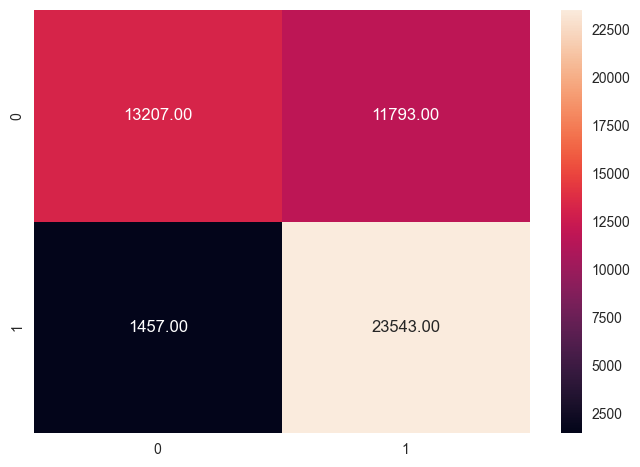

In [4]:
sns.heatmap(confusion_matrix(df['label'], df['model_label']), annot=True,fmt='.2f')

In [5]:
accuracy_score(df['label'], df['model_label'])

0.735

In [35]:
df[(df['label']==1)&(df['model_label']==0)]['text'][12659]

'I still count "Police Squad!" as the absolute funniest TV show of the 1980s. Somewhere, on BetaMax no less, I have all six episodes. I knew that a show this good wouldn\'t last and that I had to preserve it for myself. How stupid was ABC? They were quoted as saying that viewers didn\'t know that "Police Squad!" was a comedy because it had no laugh track! Right! When Drebin has a line like "You take chances just getting up in the morning, driving to work, or sticking your face in a fan.", how can THAT be comedy!?!? I\'ve seen every episode at least ten times and still see something new I missed before. Even the deep backgrounds always have gags ongoing. Don\'t miss it if you have chance to see an episode, but if you\'re reading this then you probably already have copies squirreled away someplace as I do.'

**Insights**
- We have more false positives than false negatives. it would seem that model leans more to the positive than negative even though the label has a 50% split of positive and negative labels
- Accuracy  is 73%
- One thing noticed is that textblob seem to get confusedn on the sentiment when a text is long. A summarizer could make the sentiments better.

### 3.0 Building and visualizing the Emotion clusters based on the sentiments

In [7]:
Xfeatures = df[['neg_score', 'pos_score']]

/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


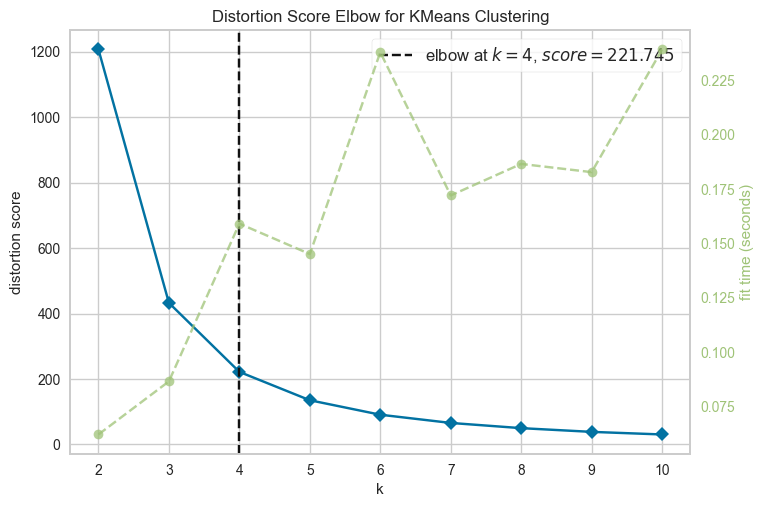

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
model = KElbowVisualizer(KMeans(random_state=42),  k=10)
model.fit(Xfeatures)
model.show()

**Insights**
It would seem that best cluster would be 4 . However for our use case , we put it to 5 

/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


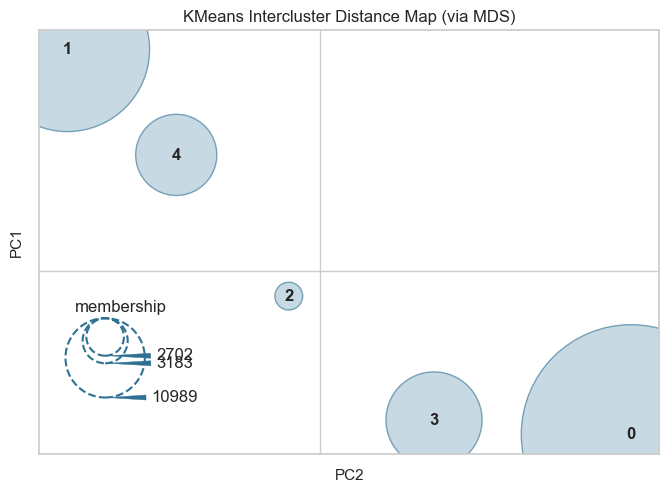

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [11]:
model = KMeans(5,random_state=0)
visualizer = InterclusterDistance(model)

visualizer.fit(Xfeatures)        # Fit the data to the visualizer
visualizer.show()  

Note: This is a good enough cluster difference

In [34]:
print(classification_report(df['label'], df['model_label']))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67     25000
           1       0.67      0.94      0.78     25000

    accuracy                           0.73     50000
   macro avg       0.78      0.73      0.72     50000
weighted avg       0.78      0.73      0.72     50000



**Insight**
Continuation of textblob evaluation
- As mentioned, the model seems to lean towards the positive.

### 3.1 - Model Prediction  and emotion mapping

In [12]:
pred = model.predict(Xfeatures)

In [13]:
df['clusters'] = pred
df.head()

,text,label,verdict,pos_score,neg_score,model_label,clusters
0,I love sci-fi and am willing to put up with a ...,0,pos,0.84372,0.15628,1,3
1,"Worth the entertainment value of a rental, esp...",0,pos,0.67091,0.32909,1,3
2,its a totally average film with a few semi-alr...,0,pos,0.78613,0.21387,1,3
3,STAR RATING: ***** Saturday Night **** Friday ...,0,pos,0.98182,0.01818,1,0
4,"First off let me say, If you haven't enjoyed a...",0,neg,0.09666,0.90334,0,1


In [56]:
pos_emotion = ['esctastic/joyful','happy/content', 'Ok/Meh']
neg_emotion = ['depressed/frustrated', 'sad/anxious', 'Ok/Meh']

def mapping_emotions():
    pos_cluster = list(df[df['verdict']=='pos'].groupby('clusters')['pos_score'].max().sort_values(ascending=False).index)
    neg_cluster = list(df[df['verdict']=='neg'].groupby('clusters')['neg_score'].max().sort_values(ascending=False).index)
    pos_emo_map = dict(zip(pos_cluster, pos_emotion))
    neg_emo_map = dict(zip(neg_cluster, neg_emotion))
    return {**pos_emo_map, **neg_emo_map}
merged_map = mapping_emotions()

{0: 'esctastic/joyful',
 3: 'happy/content',
 2: 'Ok/Meh',
 1: 'depressed/frustrated',
 4: 'sad/anxious'}

### 3.2 Sample test prediction

In [65]:
pred = model.predict([[0.3,0.7]])

/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [70]:
merged_map[pred[0]]

'happy/content'

### 4.0 Saving model and emotion mapping

In [75]:
def get_time_stamp():
    current_time = datetime.now()
    time_stamp = current_time.timestamp()
    date_time = datetime.fromtimestamp(time_stamp)
    return date_time.strftime("%d-%m-%Y-%H:%M:%S")

In [76]:
with open(f"model/{get_time_stamp()}_cluster_map.json", "w") as outfile:
    json.dump(merged_map, outfile)

In [122]:
pipe = Pipeline([('kmeans', model)])
save(pipe, f"model/{get_time_stamp()}_kmeans_model", sample_data=Xfeatures )

MlemModel(location=Location(path='/Users/a.okoh/Documents/year_highlight/model/25-12-2022-09:20:44_kmeans_model.mlem', project=None, rev=None, uri='file:///Users/a.okoh/Documents/year_highlight/model/25-12-2022-09:20:44_kmeans_model.mlem', project_uri=None, fs=<fsspec.implementations.local.LocalFileSystem object at 0x7fad284613a0>), params={}, artifacts={'data': LocalArtifact(uri='25-12-2022-09:20:44_kmeans_model', size=200885, hash='52c11722a1eb46bcce2175bb058d4f04')}, requirements=Requirements(__root__=[InstallableRequirement(module='numpy', version='1.24.0', package_name=None, extra_index=None), InstallableRequirement(module='pandas', version='1.5.2', package_name=None, extra_index=None), InstallableRequirement(module='sklearn', version='1.2.0', package_name='scikit-learn', extra_index=None)]), processors_cache={'model': SklearnPipelineType(model=Pipeline(steps=[('kmeans', KMeans(n_clusters=5, random_state=0))]), io=SimplePickleIO(), methods={'predict': Signature(name='predict', arg